# **PUNTO 1**

## Librerías y módulos

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
warnings.filterwarnings("ignore")
from IPython.display import display
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler

## EDA

En primer lugar, procedemos a importar la base de datos proporcionada.

In [2]:
datatrain = pd.read_csv('C:/Users/valcd/OneDrive/Escritorio/MachinelearningUN/Parcial_3/satisfaccion_de_clientes_class/satisfaccion_de_clientes_class/train.csv')
datatrain

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [3]:
datatrain.shape

(76020, 371)

La satisfacción del cliente es clave para el éxito organizacional, especialmente en una entidad financiera donde los clientes insatisfechos suelen abandonar la empresa sin previo aviso. Identificar a estos clientes de manera temprana permitiría implementar estrategias preventivas para mejorar su experiencia y fomentar su fidelización.

El conjunto de datos **Satisfacción de Clientes** contiene `76,020` observaciones anonimizadas con `371` variables numéricas y una columna `TARGET`, que clasifica a los clientes en satisfechos (`0`) o insatisfechos (`1`). Este análisis busca desarrollar modelos predictivos para anticipar la insatisfacción y mejorar la relación con los clientes.

Sobre las variables, dado que son datos financieros, no tenemos conocimiento a qué corresponde cada una. Por esta razón, en esta ocasión, no contaremos con un diccionario para estas.

Ahora, comprobemos el tipo de las variables.

In [4]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


Tal como se esperaba, todas son de tipo numérico, siendo la variable objetivo `TARGET` binaria. Por lo tanto, podemos observar el comportamiento de estas a partir de estadísticas descriptivas.

In [5]:
datatrain.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


De manera general, a partir de la variable `imp_ent_var16_ult1`, se observa una alta variabilidad en la mayoría de las variables, lo cual se evidencia al comparar los valores mínimos y máximos de cada una. Asimismo, se identifica una tendencia destacada en la que los tres cuartiles toman el valor 0, un patrón que también se refleja en la variable objetivo. Esto podría ser un indicio de desbalanceo en los datos, lo cual analizaremos más adelante.

Por otro lado, es importante mencionar que todas las variables parecen contener la totalidad de observaciones, lo que sugiere la ausencia de datos faltantes. Vamos a verificar esto.

### Datos faltantes

In [6]:
na = datatrain.isnull().sum().reset_index()  # Contar datos faltantes
na.columns = ['Columna', 'Cantidad de Datos Faltantes']  

# Calcular el porcentaje de datos faltantes
na['Porcentaje de Datos Faltantes'] = (na['Cantidad de Datos Faltantes'] / len(datatrain)) * 100
na['Porcentaje de Datos Faltantes'] = na['Porcentaje de Datos Faltantes'].map('{:.2f}%'.format)

tabla1 = na.style.set_table_attributes('style="width: 80%; margin: auto;"') \
    .set_caption("Datos Faltantes por Columna") \
    .background_gradient(cmap='Blues') \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', 'white'), ('color', 'black'), ('font-weight', 'bold')]}, 
        {'selector': 'td', 'props': [('padding', '10px')]} 
    ])
display(tabla1)

,Columna,Cantidad de Datos Faltantes,Porcentaje de Datos Faltantes
0,ID,0,0.00%
1,var3,0,0.00%
2,var15,0,0.00%
3,imp_ent_var16_ult1,0,0.00%
4,imp_op_var39_comer_ult1,0,0.00%
5,imp_op_var39_comer_ult3,0,0.00%
6,imp_op_var40_comer_ult1,0,0.00%
7,imp_op_var40_comer_ult3,0,0.00%
8,imp_op_var40_efect_ult1,0,0.00%
9,imp_op_var40_efect_ult3,0,0.00%


Ya podemos afirmar con certeza que, en efecto, ninguna de las variables, tanto explicativas como objetivo, cuenta con datos faltantes.

### Análisis de las variables

Antes de comenzar con el respectivo análisis, veamos el nombre de todas estas.

In [7]:
datatrainexp = datatrain.drop(columns=["TARGET"])
print(datatrainexp.columns.tolist())


['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

Ahora, eliminaremos la variable `ID` del conjunto de datos pues esta no brinda información a nuestro ejercicio de interés.

In [8]:
datatrainexp = datatrainexp.drop(columns=["ID"])
datatrainexp

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


En esta ocasión, como Científicas de datos, tomamos la decisión de realizar una reducción de dimensionalidad previa al análisis de las variables independientes con el fin de que quedarnos con aquellas que explican la mayor variabilidad de los datos. Esto, lo realizaremos con el método de **Análisis de componentes principales (PCA)**.

Para esto, lo primero que haremos es encontrar el número de componentes principales con el que vamos a trabajar con ayuda del método del codo. 

Debido a la falta de contexto sobre las características de las observaciones, vamos a considerar aquellas que expliquen al menos el 95% de la variabilidad de los datos.

Componentes necesarios para explicar el 95% de la varianza: 100


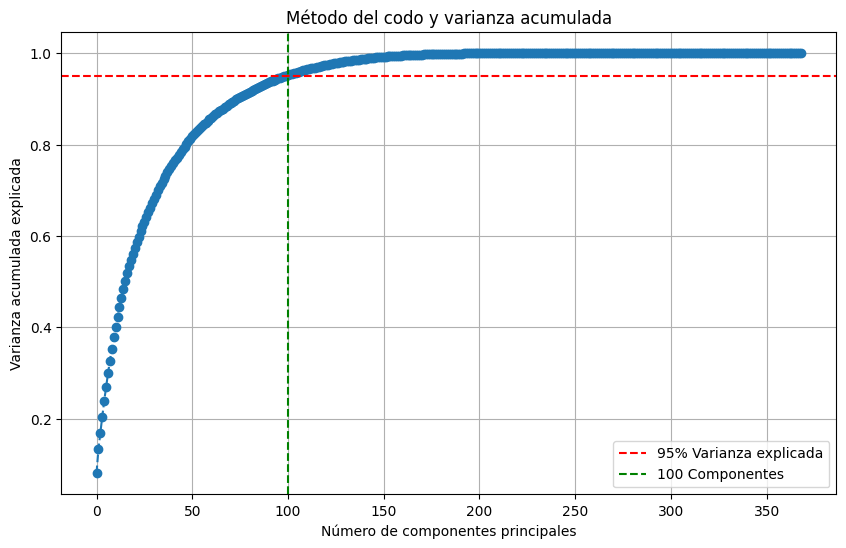

In [9]:
scaler = StandardScaler() # Escalar datos
datatrainexp_scaled = scaler.fit_transform(datatrainexp)

pca = PCA() # PCA sin limitar componentes (para análisis inicial)
datatrainexp_pca = pca.fit_transform(datatrainexp_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # Analizar la varianza explicada

# Encontrar el número de componentes para el 95% de varianza
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Componentes necesarios para explicar el 95% de la varianza: {n_components_95}")

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Varianza explicada")
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f"{n_components_95} Componentes")
plt.title("Método del codo y varianza acumulada")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza acumulada explicada")
plt.legend()
plt.grid()
plt.show()

Ahora trabajaremos con `100 componentes principales` en lugar de las `371` variables originales. Estas `100` son combinaciones lineales de las variables originales que explican, como mínimo, el `95%` de la variabilidad presente en los datos. Estas representan las características más relevantes para retener la mayor parte de la información del conjunto de datos y serán mostradas en la siguiente tabla ordenadas de mayor a menor de acuerdo con su contribución.

In [10]:
# Paso 1: Obtener las componentes principales ya ajustadas con 100 componentes
pca_optimal = PCA(n_components=100)
datatrainexp_pca_optimal = pca_optimal.fit_transform(datatrainexp_scaled)

# Paso 2: Analizar las proporciones de varianza explicada
explained_variance = pca_optimal.explained_variance_ratio_

print("Proporción de varianza explicada por los primeros 100 componentes principales:")
print(explained_variance)

# Paso 3: Obtener las contribuciones de las variables originales a los componentes principales
components = pca_optimal.components_

# Crear un DataFrame para mostrar las contribuciones de cada variable en los componentes principales
contributions = pd.DataFrame(
    components.T, 
    index=datatrainexp.columns,  # Nombres de las variables originales
    columns=[f'PC{i+1}' for i in range(100)]  # Nombres de los componentes principales
)

contribucion = contributions.abs().sum(axis=1).sort_values(ascending=False).head(100)

# Crear un DataFrame para darle formato
contribucion_df = pd.DataFrame(contribucion, columns=['Contribución Total'])

tabla2 = contribucion_df.style.set_table_attributes('style="margin: auto;"') \
    .set_caption("Contribución de las variables a los componentes principales") \
    .background_gradient(cmap='Blues') \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', 'white'), ('color', 'black'), ('font-weight', 'bold')]},  
        {'selector': 'td', 'props': [('padding', '5px')]}  
    ]) \
    .set_properties(**{'text-align': 'center'})  
display(tabla2)

Proporción de varianza explicada por los primeros 100 componentes principales:
[0.08081681 0.05228942 0.03643922 0.0347879  0.03414537 0.03118406
 0.02941257 0.02824084 0.0260988  0.02561241 0.02254603 0.02132163
 0.02109872 0.02044335 0.01988033 0.01750806 0.01632033 0.01558424
 0.01390963 0.01322503 0.01291861 0.01234806 0.0122385  0.01180376
 0.01076219 0.01060324 0.01031092 0.01010785 0.00997737 0.00964378
 0.00951368 0.00935107 0.00914795 0.00873869 0.00846727 0.0080328
 0.00736512 0.00715435 0.00676614 0.00666676 0.00646893 0.00625363
 0.0062378  0.00607093 0.00600726 0.00598769 0.00581279 0.00577231
 0.00569488 0.00552524 0.00521107 0.00509326 0.00441736 0.00433952
 0.00418982 0.00411412 0.00407112 0.00390292 0.00382852 0.00371203
 0.00366308 0.00356288 0.00355259 0.00330957 0.00324114 0.00309242
 0.00302323 0.00298365 0.00296569 0.00294008 0.00283177 0.00278201
 0.00276678 0.00266022 0.00255565 0.00251896 0.00246315 0.00243182
 0.0023678  0.00228526 0.00227213 0.00221204 0.0021

,Contribución Total
num_var22_ult1,5.910986
saldo_medio_var12_hace3,5.804774
saldo_medio_var8_hace3,5.575031
var15,5.528984
ind_var43_emit_ult1,5.508903
num_var43_recib_ult1,5.475920
num_trasp_var11_ult1,5.344374
num_var22_hace3,5.262286
ind_var30_0,5.222495
num_var22_hace2,5.214307


Ahora, entre las `100` variables, escogeremos `10` de ellas para hacer un análisis de estas y posteriormente, un análisis entre ellas.

In [11]:
variablespca = contribucion.index.tolist() 
variables = variablespca  
datatrainexp = datatrain[variables]
datatrainexp

,num_var22_ult1,saldo_medio_var12_hace3,saldo_medio_var8_hace3,var15,ind_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var22_hace3,ind_var30_0,num_var22_hace2,...,delta_num_reemb_var17_1y3,delta_imp_reemb_var17_1y3,saldo_medio_var29_hace3,imp_op_var41_efect_ult3,ind_var17,imp_op_var39_efect_ult3,num_med_var45_ult3,num_var17_0,num_op_var41_efect_ult1,num_var22_ult3
0,0,0.0,0.0,23,0,0,0,0,1,0,...,0,0,0.0,0.0,0,0.0,0,0,0,0
1,0,0.0,0.0,34,0,0,0,0,1,0,...,0,0,0.0,0.0,0,0.0,0,0,0,0
2,0,0.0,0.0,23,0,0,0,0,1,0,...,0,0,0.0,0.0,0,0.0,0,0,0,0
3,0,0.0,0.0,37,0,0,0,0,1,3,...,0,0,0.0,0.0,0,0.0,15,0,0,3
4,6,0.0,0.0,39,1,6,3,0,1,3,...,0,0,0.0,0.0,0,0.0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0,0.0,0.0,48,0,0,0,0,1,0,...,0,0,0.0,0.0,0,0.0,0,0,0,0
76016,0,0.0,0.0,39,0,0,0,0,1,24,...,0,0,0.0,0.0,0,0.0,15,0,0,24
76017,0,0.0,0.0,23,0,0,0,0,1,0,...,0,0,0.0,0.0,0,0.0,0,0,0,0
76018,0,0.0,0.0,25,0,0,0,0,1,0,...,0,0,0.0,0.0,0,0.0,0,0,0,0


##### Análisis univariado

* Variables explicativas

Aquí, graficaremos las distribuciones de los datos para comprender el comportamiento de cada una de ellas y poder realizar los respectivos análisis.

In [12]:
best10 = variables[:10]
best10= datatrainexp[best10]

 Boxplots

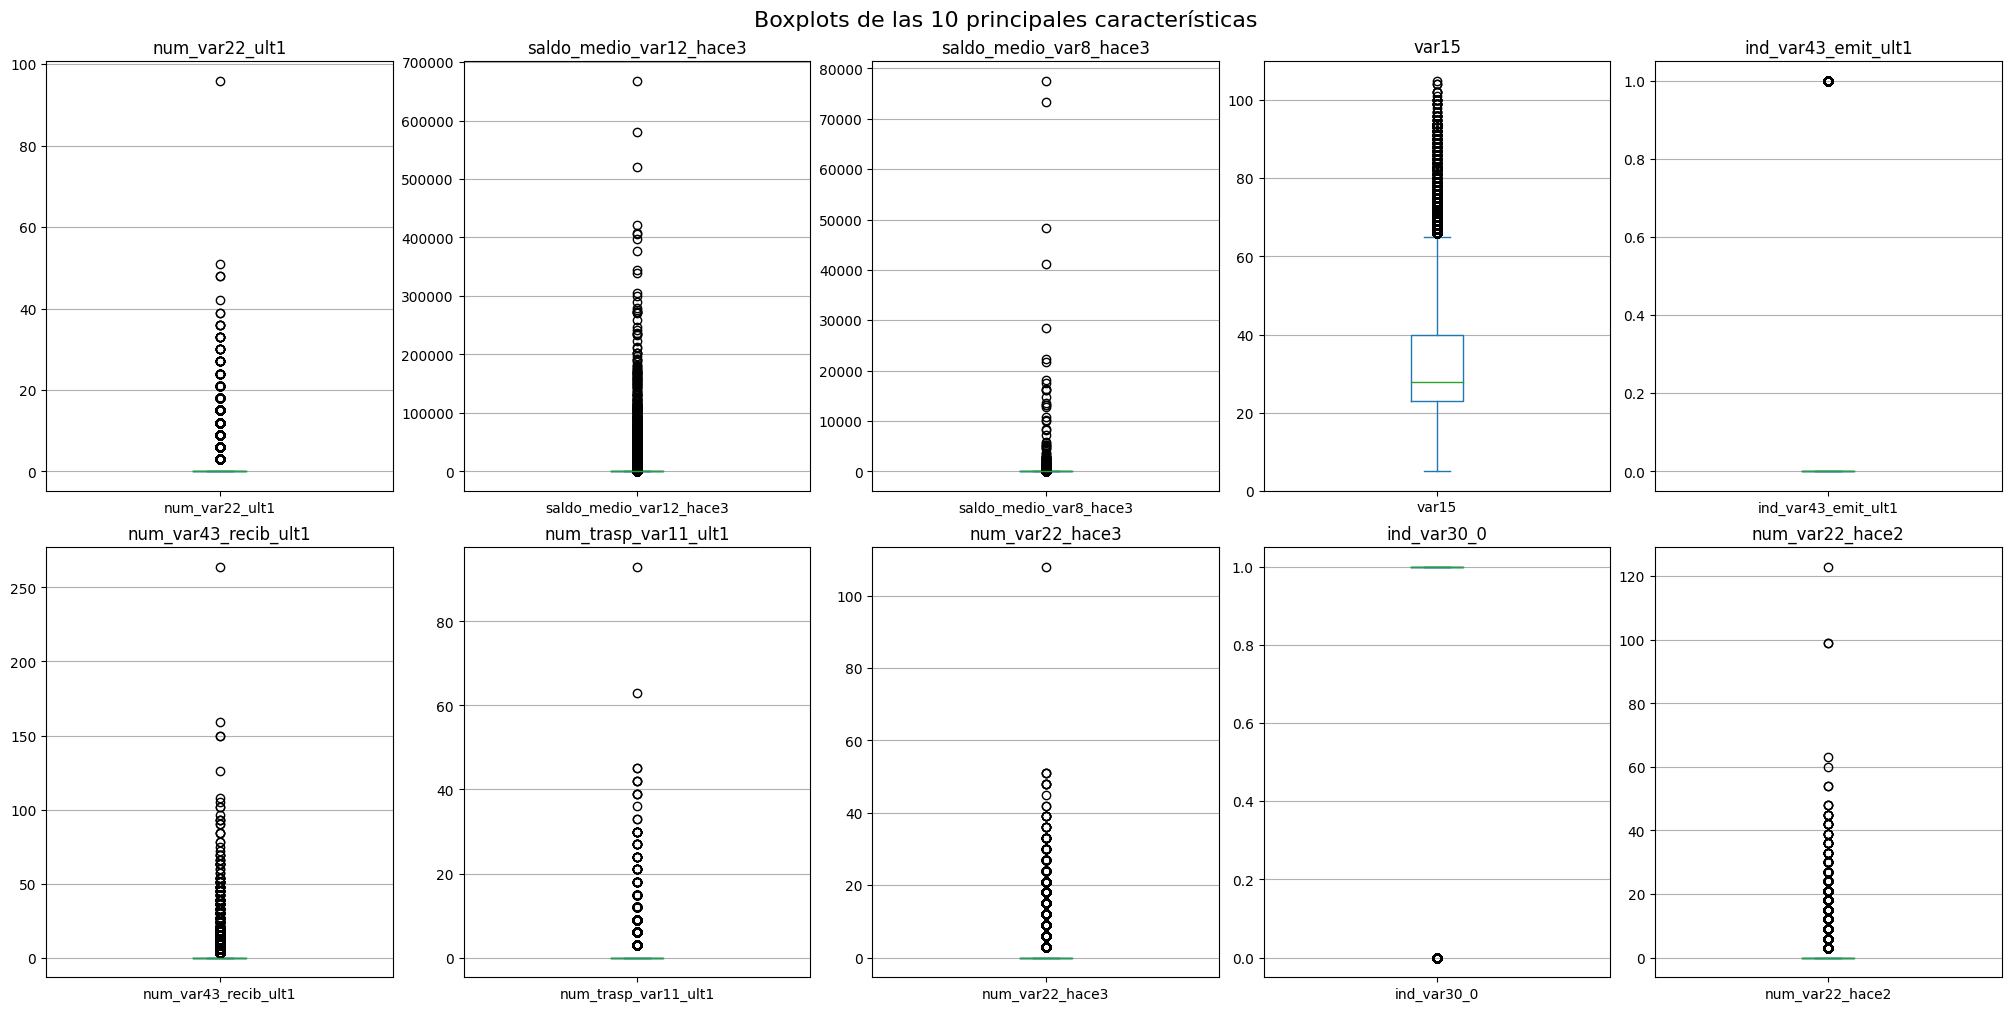

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)

for ax, variable in zip(axes.flat, best10):
    best10[variable].plot(kind='box', ax=ax, vert=True)
    ax.set_title(variable)
    ax.grid(axis='y')

plt.suptitle("Boxplots de las 10 principales características", fontsize=16)
plt.show()



Es evidente la gran cantidad de datos atípicos presentes en esta base de datos. Este comportamiento visual era algo esperado, ya que al analizar las estadísticas descriptivas inicialmente, se observó una alta variabilidad en los datos.

Además, se puede notar que la mayoría de las variables, excepto `var15` e `ind_var30_0`, tienen la mayoría de sus valores concentrados en `0`. Esto provoca que sus boxplots prácticamente no muestren cajas, ya que los bigotes y los cuartiles coinciden en `0`.

No obstante, este es el mismo comportamiento que presenta `ind_var30_0`, solo que en este caso, los valores se encuentran concentrados en `1`.

Ahora, analicemos la variable `var15` que proporciona mayor información para estudiar.

In [14]:
best10['var15'].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

Esta variable presenta una media de `33.12` y una desviación estándar de aproximadamente `13`. Su valor mínimo es `5` y el máximo `105`, lo que indica que los datos extremos son relativamente cercanos en comparación con las demás variables analizadas.


Se observa que la mayor variabilidad ocurre en el primer y último `25%` de los datos (es decir, los extremos), donde los bigotes son un poco extensos. En cuanto a los datos dentro de la caja, el segundo `25%` (entre el primer cuartil `23` y el segundo cuartil o mediana `28`) está más concentrado, mientras que los datos entre la mediana y el tercer cuartil (`28` y `40`, respectivamente) muestran una mayor dispersión.


Histogramas

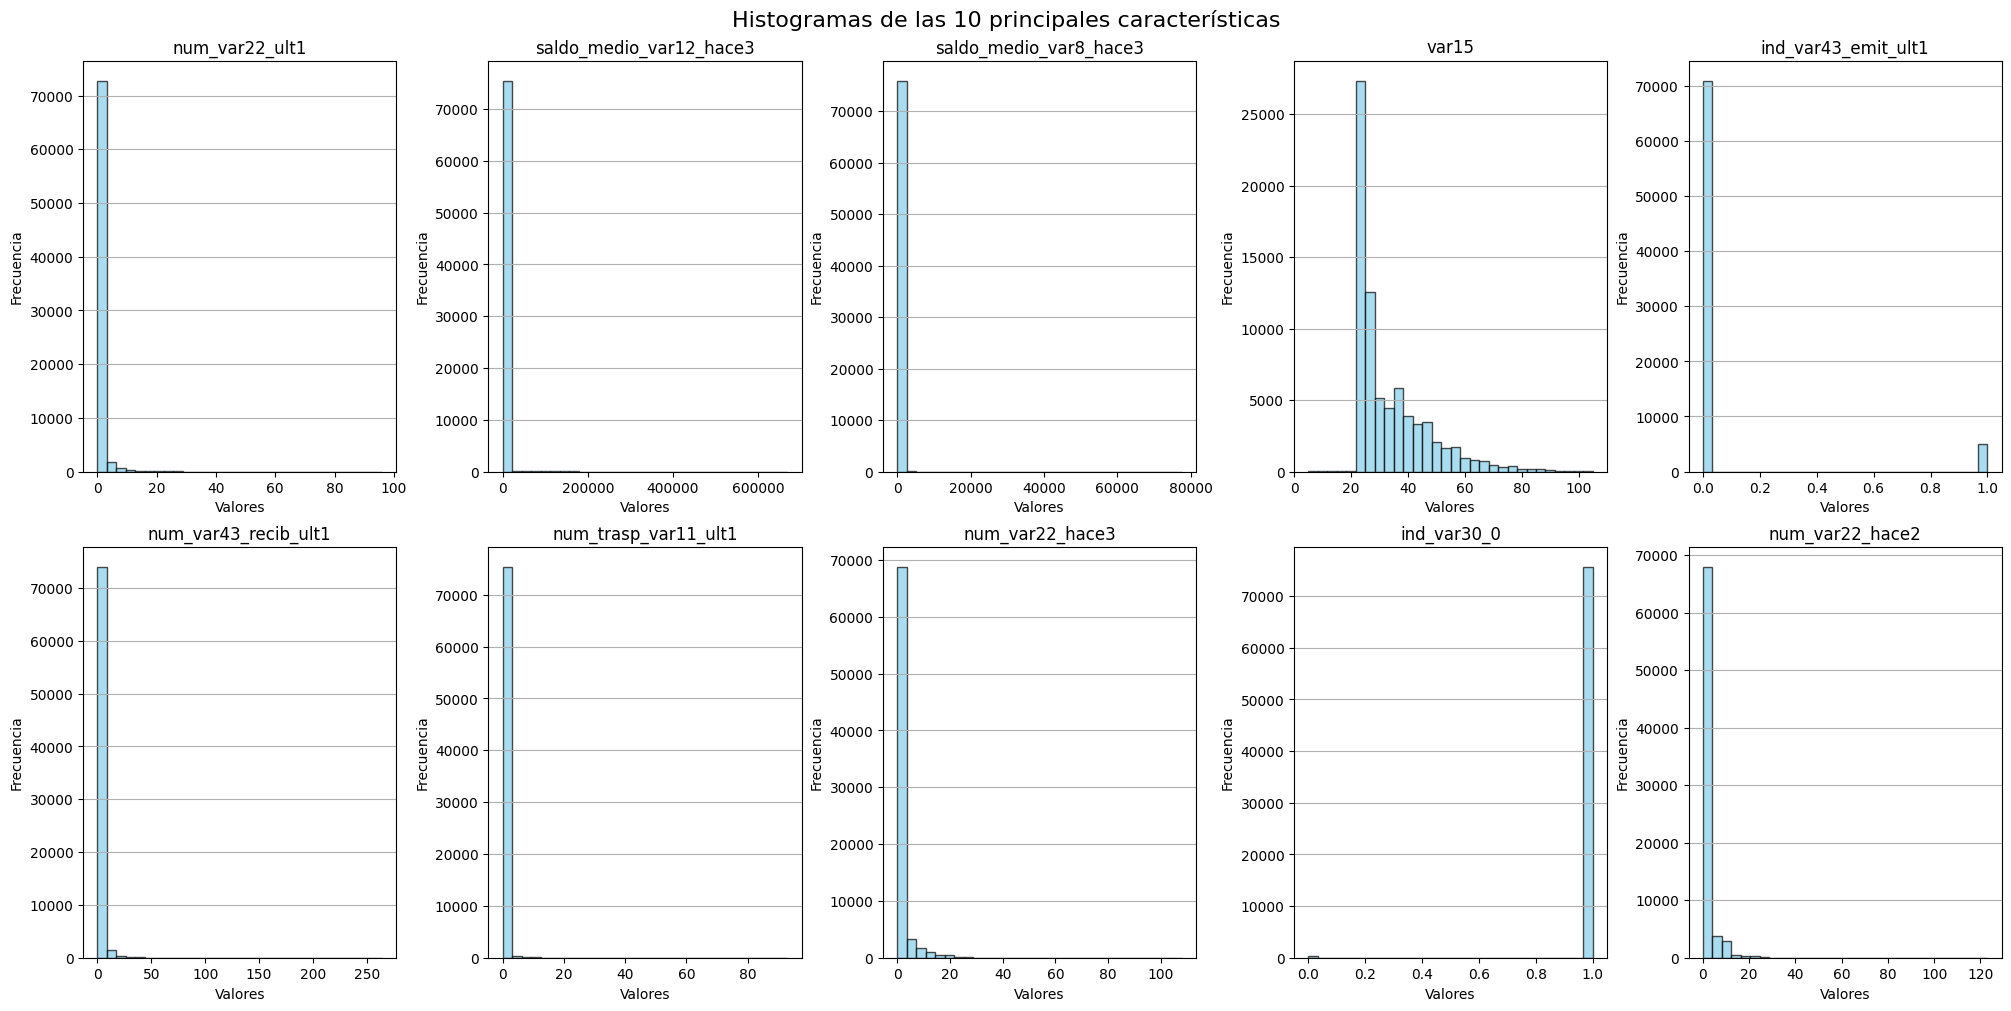

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)

for ax, variable in zip(axes.flat, best10):
    best10[variable].plot(kind='hist', ax=ax, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(variable)
    ax.set_xlabel("Valores")
    ax.set_ylabel("Frecuencia")
    ax.grid(axis='y')

plt.suptitle("Histogramas de las 10 principales características", fontsize=16)
plt.show()


Estas gráficas muestran que las variables no siguen una distribución normal, como era de esperarse, y además tampoco son simétricas, presentando un sesgo positivo en la mayoría de los casos. Muchas variables tienen una gran concentración de valores cercanos a 0, mientras que los valores más altos son mucho menos frecuentes, reflejando un patrón desigual en su distribución.

Por otro lado, `var15`, presenta una mayor dispersión, indicando una distribución más heterogénea en comparación con otras. Sin embargo, en general, el patrón predominante es el de colas largas hacia valores altos, lo que evidencia la existencia de valores extremos que afectan la distribución.

* Variable objetivo

Lo primero que haremos es calcular la cantidad de clientes que corresponden a las dos clases, es decir, persona satisfecha (`0`) o persona insatisfecha (`1`).

In [16]:
conteo = datatrain['TARGET'].value_counts()
porcentaje = datatrain['TARGET'].value_counts(normalize=True) * 100

resumen = pd.DataFrame({
    'Clase': conteo.index,
    'Cantidad': conteo.values,
    'Porcentaje': porcentaje.values
})

resumen


,Clase,Cantidad,Porcentaje
0,0,73012,96.043147
1,1,3008,3.956853


Veamos esto gráficamente.

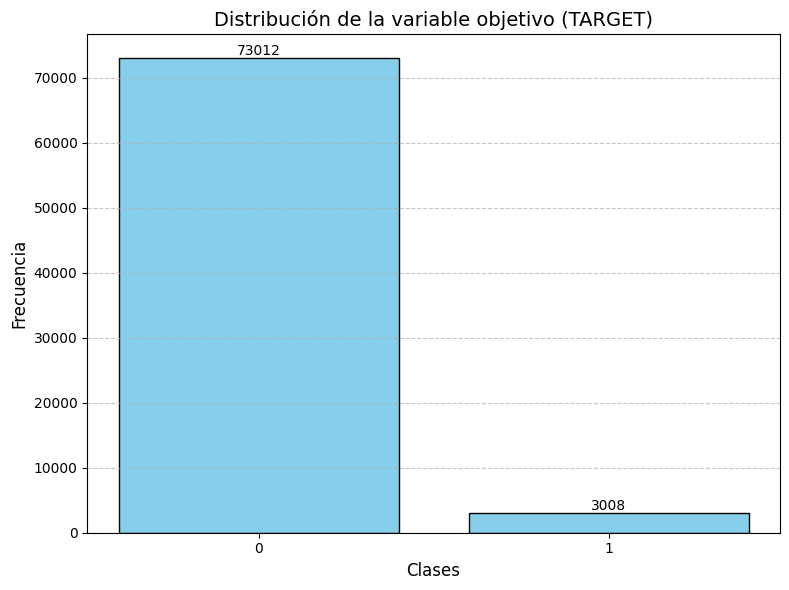

In [17]:
frecuencia = datatrain['TARGET'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(frecuencia.index, frecuencia.values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Distribución de la variable objetivo (TARGET)', fontsize=14)
plt.xlabel('Clases', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(frecuencia.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Para resolver esta situación, procederemos a realizar el balanceo por el método de **ADASYN**, con base en la base de datos generada despues de aplicar PCA.

In [19]:
datatrainfinal = pd.concat([datatrainexp, datatrain['TARGET']], axis=1)

X = datatrainfinal.drop('TARGET', axis=1)
y = datatrainfinal['TARGET']

print("Distribución antes de balancear:", Counter(y))

adasyn = ADASYN(random_state=21)
X_balanceado, y_balanceado = adasyn.fit_resample(X, y)

print("Distribución después de balancear:", Counter(y_balanceado))

datatrainbalanceado = pd.DataFrame(X_balanceado, columns=X.columns)
datatrainbalanceado['TARGET'] = y_balanceado

datatrainbalanceado


Distribución antes de balancear: Counter({0: 73012, 1: 3008})
Distribución después de balancear: Counter({1: 73250, 0: 73012})


,num_var22_ult1,saldo_medio_var12_hace3,saldo_medio_var8_hace3,var15,ind_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var22_hace3,ind_var30_0,num_var22_hace2,...,delta_imp_reemb_var17_1y3,saldo_medio_var29_hace3,imp_op_var41_efect_ult3,ind_var17,imp_op_var39_efect_ult3,num_med_var45_ult3,num_var17_0,num_op_var41_efect_ult1,num_var22_ult3,TARGET
0,0,0.0,0.0,23,0,0,0,0,1,0,...,0,0.0,0.0,0,0.0,0,0,0,0,0
1,0,0.0,0.0,34,0,0,0,0,1,0,...,0,0.0,0.0,0,0.0,0,0,0,0,0
2,0,0.0,0.0,23,0,0,0,0,1,0,...,0,0.0,0.0,0,0.0,0,0,0,0,0
3,0,0.0,0.0,37,0,0,0,0,1,3,...,0,0.0,0.0,0,0.0,15,0,0,3,0
4,6,0.0,0.0,39,1,6,3,0,1,3,...,0,0.0,0.0,0,0.0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146257,0,0.0,0.0,61,0,0,0,0,1,0,...,0,0.0,0.0,0,0.0,0,0,0,0,1
146258,0,0.0,0.0,61,0,0,0,0,1,0,...,0,0.0,0.0,0,0.0,0,0,0,0,1
146259,0,0.0,0.0,61,0,0,0,0,1,0,...,0,0.0,0.0,0,0.0,0,0,0,0,1
146260,0,0.0,0.0,61,0,0,0,0,1,0,...,0,0.0,0.0,0,0.0,0,0,0,0,1


Como resultado del balanceo, se obtuvo este nuevo conjunto de datos con una cantidad significativamente mayor de observaciones. Esto se debe a que **ADASYN** genera nuevas muestras sintéticas para la clase minoritaria, en este caso la de nuestro interés, adaptándose a las regiones menos representadas de los datos. Este proceso no solo equilibra las clases, sino que también aumenta el tamaño total del conjunto de datos, lo que ayuda al modelo a aprender mejor los patrones importantes en un contexto donde antes las clases estaban desbalanceadas.